In [10]:
# read in data

filename = '/Users/allisontegge/Documents/GitHub/STAT2984-2018/Example-Code/introduction-to-python/movie-profits.txt'

f = open(filename,'r').readlines()

data = {}
header = f[0].strip().split('\t')

for line in f[1:]:
    l = line.strip().split('\t')
    for i,h in enumerate(l):
        if header[i] not in data:
            data[header[i]] = []
        data[header[i]].append(h)
    

print header
#print data


['Year', 'Movie', 'US Gross ($M)', 'Budget ($M)', 'Run Time (min)', 'Critic Score (Rotten Tomatoes)']


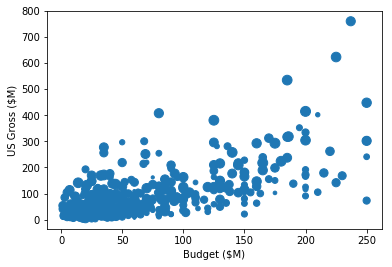

In [18]:
# visualization
# Scatterplot
# x-axis: budget
# y-axis: gross

import numpy as np
import matplotlib.pyplot as plt


x = [float(a) for a in data['Budget ($M)']]
y = [float(a) for a in data['US Gross ($M)']]
score = [float(a) for a in data['Critic Score (Rotten Tomatoes)']]

#colors = np.random.rand(N)
area = score  # 0 to 15 point radii

fig, ax = plt.subplots()

plt.scatter(x, y, s=area) #, c=colors, alpha=0.5)

ax.set_xlabel('Budget ($M)')
ax.set_ylabel('US Gross ($M)')

plt.show()

In [27]:
# find the line of best fit
# x-axis: budget
# y-axis: gross

from sklearn import linear_model

x = [[float(data['Budget ($M)'][a]),float(data['Critic Score (Rotten Tomatoes)'][a])] \
         for a,v in enumerate(data['Budget ($M)'])]
y = [float(a) for a in data['US Gross ($M)']]
score = [float(a) for a in data['Critic Score (Rotten Tomatoes)']]

x_np = np.array(x)
print x_np
reg = linear_model.LinearRegression()
reg.fit (x_np, y)

print reg.coef_
print reg.intercept_

[[ 100.   88.]
 [  25.   18.]
 [  40.   81.]
 ..., 
 [  25.   77.]
 [  60.    4.]
 [  20.    0.]]
[ 1.01271799  0.69890283]
-16.0987993261


In [30]:
# write to file

writefilename = 'movie-profits-regression-results.txt'
w = open(writefilename, 'w')

w.write('Coefficients:\n')
w.write('Budget: %.2f\n'%reg.coef_[0])
w.write('Critic score: %.2f\n'%reg.coef_[1])
w.write('Intercept:%.2f\n'%reg.intercept_)

w.close()


